In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np

Using TensorFlow backend.


In [2]:
#from keras import regularizers
#encoding_dim = 32
#input_img = Input(shape=(784,))
#encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(1e-8))(input_img)
#decoded = Dense(784, activation='sigmoid')(encoded)
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization
from keras.models import Model
from keras import backend as K
input_img = Input(shape=(28,28,1))
#encoded = Dense(128, activation='relu')(input_img)
#encoded = Dense(64, activation='relu')(encoded)
#encoded = Dense(32, activation='relu')(encoded)
#decoded = Dense(64, activation='relu')(encoded)
#decoded = Dense(128, activation = 'relu')(decoded)
#decoded = Dense(784, activation='sigmoid')(decoded)
x = Conv2D(32, (3, 3), activation='relu', padding='same', use_bias=False)(input_img)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', use_bias=False)(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', use_bias=False)(x)
x = BatchNormalization(axis=-1)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(16, (3, 3), activation='relu', padding='same', use_bias=False)(encoded)
x = BatchNormalization(axis=-1)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same', use_bias=False)(x)
x = BatchNormalization(axis=-1)(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid', use_bias=False)(x)
x = BatchNormalization(axis=-1)(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', use_bias=False)(x)

autoencoder = Model(input_img, decoded)




#autoencoder = Model(input_img, decoded)

In [3]:
#encoder = Model(input_img, encoded)
#encoded_input = Input(shape=(, ))
#decoder_layer = autoencoder.layers[-1]
#decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='rmsprop', loss='binary_crossentropy')


In [16]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(x_train.shape, x_test.shape)


noise_factor = 0.5

x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [17]:
history = autoencoder.fit(x_train_noisy, x_train, epochs = 2, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 433s 7ms/step - loss: 0.3165 - val_loss: 0.4003
Epoch 2/2
60000/60000 [==============================] - 428s 7ms/step - loss: 0.3088 - val_loss: 0.3437


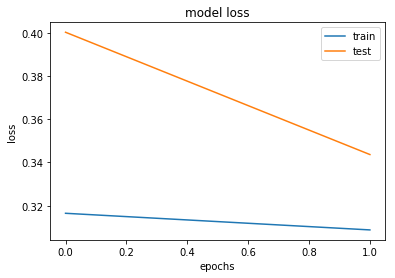

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(history):
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('model loss')
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train', 'test'])
    plt.show()
    
plot_history(history)

In [19]:
#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

decoded_imgs = autoencoder.predict(x_test_noisy)

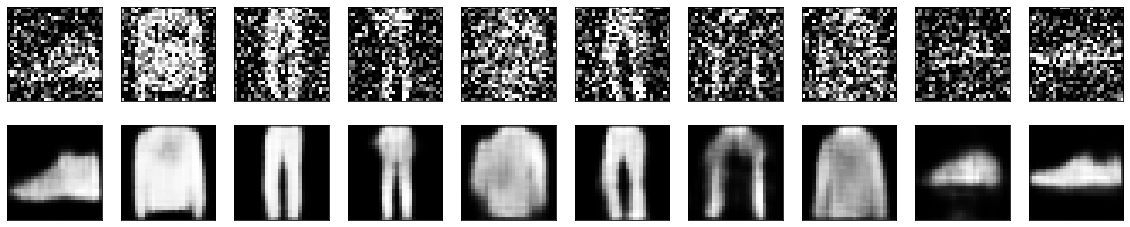

In [20]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
    
    
    
    

